In [1]:
import os
import urllib
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("datasets/data.csv")

jan6_data = pd.read_csv("datasets/01-06-2021.csv")
jan7_data = pd.read_csv("datasets/01-07-2021.csv")
jan8_data = pd.read_csv("datasets/01-08-2021.csv")

data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-07 5:22,33.939110,67.709953,53105,2244,42666,8195.0,Afghanistan,136.417321,4.225591
1,NaN,NaN,NaN,Albania,2021-01-07 5:22,41.153300,20.168300,61008,1217,36102,23689.0,Albania,2119.952742,1.994820
2,NaN,NaN,NaN,Algeria,2021-01-07 5:22,28.033900,1.659600,101120,2786,68383,29951.0,Algeria,230.598848,2.755142
3,NaN,NaN,NaN,Andorra,2021-01-07 5:22,42.506300,1.521800,8348,84,7615,649.0,Andorra,10804.374560,1.006229
4,NaN,NaN,NaN,Angola,2021-01-07 5:22,-11.202700,17.873900,17864,413,11477,5974.0,Angola,54.353600,2.311912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11926,NaN,NaN,NaN,Vietnam,2021-01-09 5:22,14.058324,108.277199,1512,35,1357,120.0,Vietnam,1.553341,2.314815
11927,NaN,NaN,NaN,West Bank and Gaza,2021-01-09 5:22,31.952200,35.233200,146074,1559,128900,15615.0,West Bank and Gaza,2863.401064,1.067267
11928,NaN,NaN,NaN,Yemen,2021-01-09 5:22,15.552727,48.516388,2104,610,1405,89.0,Yemen,7.054256,28.992395
11929,NaN,NaN,NaN,Zambia,2021-01-09 5:22,-13.133897,27.849332,25326,441,20349,4536.0,Zambia,137.761426,1.741294


In [2]:
data = data.drop(['FIPS', 'Admin2', 'Province_State'], axis = 1)

In [3]:
data

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,Afghanistan,2021-01-07 5:22,33.939110,67.709953,53105,2244,42666,8195.0,Afghanistan,136.417321,4.225591
1,Albania,2021-01-07 5:22,41.153300,20.168300,61008,1217,36102,23689.0,Albania,2119.952742,1.994820
2,Algeria,2021-01-07 5:22,28.033900,1.659600,101120,2786,68383,29951.0,Algeria,230.598848,2.755142
3,Andorra,2021-01-07 5:22,42.506300,1.521800,8348,84,7615,649.0,Andorra,10804.374560,1.006229
4,Angola,2021-01-07 5:22,-11.202700,17.873900,17864,413,11477,5974.0,Angola,54.353600,2.311912
...,...,...,...,...,...,...,...,...,...,...,...
11926,Vietnam,2021-01-09 5:22,14.058324,108.277199,1512,35,1357,120.0,Vietnam,1.553341,2.314815
11927,West Bank and Gaza,2021-01-09 5:22,31.952200,35.233200,146074,1559,128900,15615.0,West Bank and Gaza,2863.401064,1.067267
11928,Yemen,2021-01-09 5:22,15.552727,48.516388,2104,610,1405,89.0,Yemen,7.054256,28.992395
11929,Zambia,2021-01-09 5:22,-13.133897,27.849332,25326,441,20349,4536.0,Zambia,137.761426,1.741294


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11931 entries, 0 to 11930
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country_Region       11931 non-null  object 
 1   Last_Update          11931 non-null  object 
 2   Lat                  11673 non-null  float64
 3   Long_                11673 non-null  float64
 4   Confirmed            11931 non-null  int64  
 5   Deaths               11931 non-null  int64  
 6   Recovered            11931 non-null  int64  
 7   Active               11928 non-null  float64
 8   Combined_Key         11931 non-null  object 
 9   Incident_Rate        11673 non-null  float64
 10  Case_Fatality_Ratio  11809 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 1.0+ MB


In [5]:
data.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
count,11673.000000,11673.000000,1.193100e+04,11931.000000,1.193100e+04,1.192800e+04,11673.000000,11809.000000
mean,35.991396,-72.064190,2.213522e+04,477.396614,1.234363e+04,9.316156e+03,6111.645204,1.959323
std,12.991060,53.522116,1.107562e+05,2744.538371,8.490261e+04,6.630058e+04,3311.209983,6.812203
min,-52.368000,-178.116500,0.000000e+00,0.000000,0.000000e+00,-1.134877e+06,0.000000,0.000000
25%,33.269842,-96.616339,7.520000e+02,10.000000,0.000000e+00,6.360000e+02,3891.999427,0.974161
50%,37.952303,-86.854759,2.096000e+03,34.000000,0.000000e+00,1.786500e+03,6264.747051,1.538462
75%,42.220792,-77.494647,8.223000e+03,116.000000,0.000000e+00,5.248500e+03,8212.463067,2.309694
max,71.706900,178.065000,2.742349e+06,69670.000000,2.182145e+06,2.498130e+06,27767.695100,411.111111


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000184B19D7E50>,
      dtype=object)

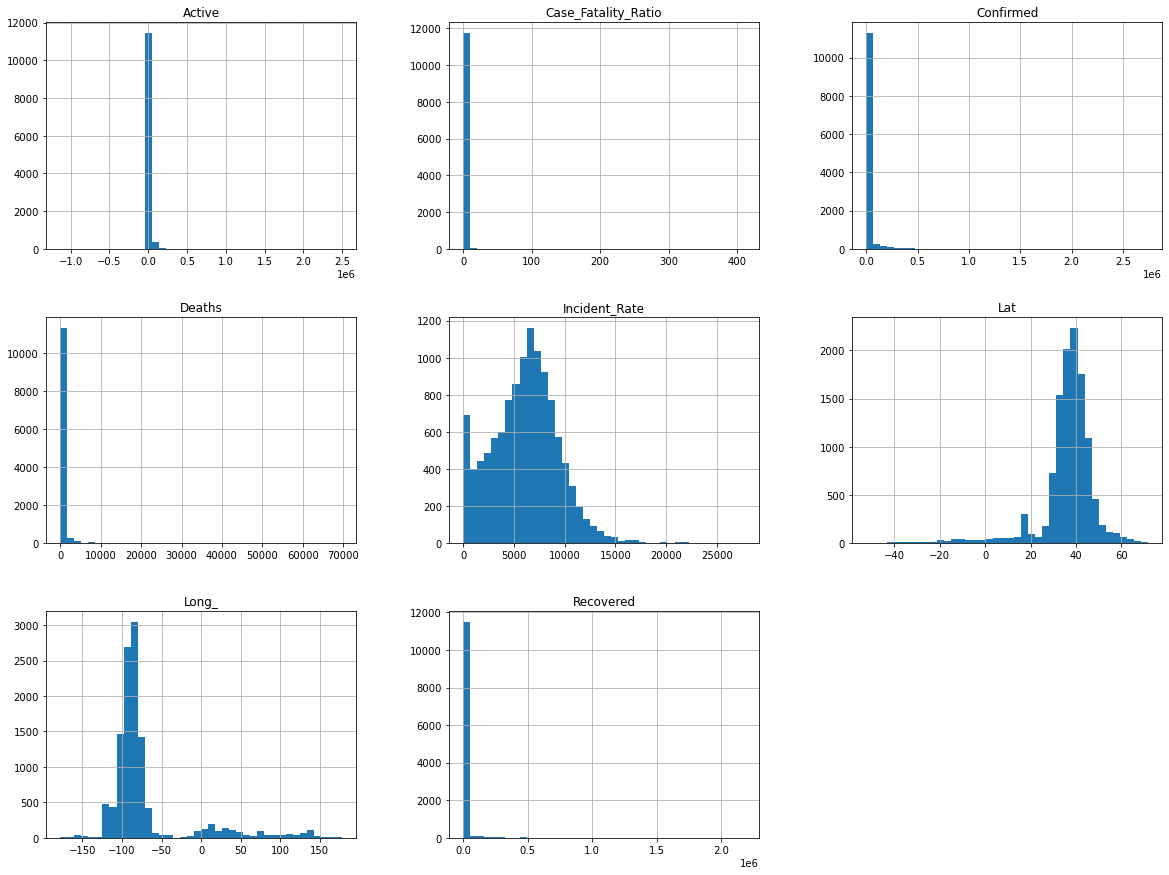

In [6]:
data.hist(bins=40, figsize=(20,15))

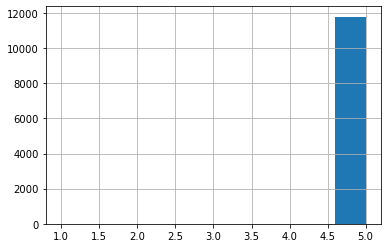

In [68]:
data["confirmed_cat"] = pd.cut(data["Confirmed"],
                              bins=[0, 1.5, 3,4.5,6,np.inf],
                              labels=[1,2,3,4,5])

data["confirmed_cat"].hist()

In [73]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=50)

train_set

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,confirmed_cat
9996,US,2021-01-09 5:22,44.823677,-94.272870,3168,41,0,3127.0,"McLeod, Minnesota, US",8826.233527,1.294192,5
8829,US,2021-01-09 5:22,36.603082,-121.069975,4266,36,0,4230.0,"San Benito, California, US",6792.128391,0.843882,5
856,US,2021-01-07 5:22,36.074091,-119.815997,16860,110,0,16750.0,"Kings, California, US",11023.930950,0.652432,5
1472,US,2021-01-07 5:22,42.385211,-94.640460,1200,9,0,1191.0,"Calhoun, Iowa, US",12412.081090,0.750000,5
2660,US,2021-01-07 5:22,35.710151,-79.805703,8788,133,0,8655.0,"Randolph, North Carolina, US",6116.923163,1.513427,5
...,...,...,...,...,...,...,...,...,...,...,...,...
8324,Lebanon,2021-01-09 5:22,33.854700,35.862300,210139,1570,138839,69730.0,Lebanon,3078.760321,0.747125,5
10206,US,2021-01-09 5:22,37.616230,-93.398282,1934,24,0,1910.0,"Polk, Missouri, US",6015.739214,1.240951,5
6253,US,2021-01-08 5:22,37.317289,-91.965647,1405,18,0,1387.0,"Texas, Missouri, US",5531.931648,1.281139,5
10123,US,2021-01-09 5:22,39.984922,-94.801630,1169,15,0,1154.0,"Andrew, Missouri, US",6600.045167,1.283148,5


In [71]:
test_set


,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
8584,Sweden,2021-01-09 5:22,55.990300,13.595800,78745,814,0,77931.0,"Skane, Sweden",5715.158725,1.033716
2512,US,2021-01-07 5:22,35.688624,-106.868780,8625,140,0,8485.0,"Sandoval, New Mexico, US",5877.422520,1.623188
4480,Russia,2021-01-08 5:22,43.397615,45.698501,9397,96,5607,3694.0,"Chechen Republic, Russia",653.940449,1.021603
3876,US,2021-01-07 5:22,44.475587,-89.501530,6097,56,0,6041.0,"Portage, Wisconsin, US",8614.988979,0.918485
10651,US,2021-01-09 5:22,48.814939,-103.487361,143,2,0,141.0,"Divide, North Dakota, US",6316.254417,1.398601
...,...,...,...,...,...,...,...,...,...,...,...
8575,Sweden,2021-01-09 5:22,57.468400,18.486700,2380,34,0,2346.0,"Gotland, Sweden",3987.534765,1.428571
10751,US,2021-01-09 5:22,39.753949,-84.290510,38845,380,0,38465.0,"Montgomery, Ohio, US",7305.990178,0.978247
4344,Kyrgyzstan,2021-01-08 5:22,41.204380,74.766098,81826,1363,77376,3087.0,Kyrgyzstan,1254.193815,1.665730
3553,US,2021-01-07 5:22,29.277659,-96.223192,2579,75,0,2504.0,"Wharton, Texas, US",6206.083357,2.908104


In [9]:
 len(train_set)

9544

In [10]:
len(test_set)

2387

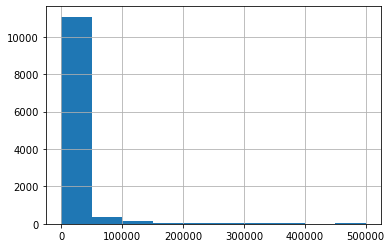

In [11]:
data["Confirmed"].hist( range=[0, 500000])

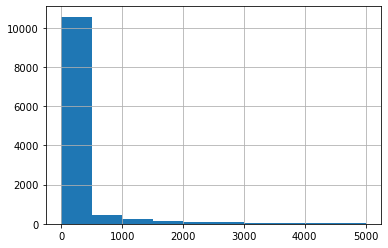

In [12]:
data["Deaths"].hist(range=[0,5000])

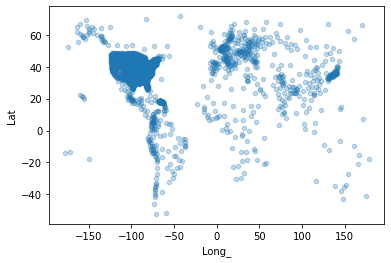

In [13]:
data.plot(kind="scatter", x="Long_", y="Lat", alpha = 0.1)

In [14]:
corr_matrix = data.corr()

In [15]:
corr_matrix["Confirmed"].sort_values(ascending=False)

Confirmed              1.000000
Deaths                 0.907439
Recovered              0.789422
Active                 0.622109
Long_                  0.223263
Case_Fatality_Ratio    0.005801
Incident_Rate         -0.125062
Lat                   -0.133839
Name: Confirmed, dtype: float64

In [79]:
data = train_set.drop("Confirmed", axis=1)
data_labels_confirmed = train_set["Confirmed"].copy()
data_labels_confirmed

9996       3168
8829       4266
856       16860
1472       1200
2660       8788
          ...  
8324     210139
10206      1934
6253       1405
10123      1169
5600        439
Name: Confirmed, Length: 9544, dtype: int64

In [80]:
from pandas.plotting import scatter_matrix

attributes = ["Confirmed", "Deaths", "Recovered", "Active"]
scatter_matrix(data[attributes], figsize=(12,8))

KeyError: "['Confirmed'] not in index"

In [81]:
data.drop(["Combined_Key"],axis = 1)

,Country_Region,Last_Update,Lat,Long_,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,confirmed_cat
9996,US,2021-01-09 5:22,44.823677,-94.272870,41,0,3127.0,8826.233527,1.294192,5
8829,US,2021-01-09 5:22,36.603082,-121.069975,36,0,4230.0,6792.128391,0.843882,5
856,US,2021-01-07 5:22,36.074091,-119.815997,110,0,16750.0,11023.930950,0.652432,5
1472,US,2021-01-07 5:22,42.385211,-94.640460,9,0,1191.0,12412.081090,0.750000,5
2660,US,2021-01-07 5:22,35.710151,-79.805703,133,0,8655.0,6116.923163,1.513427,5
...,...,...,...,...,...,...,...,...,...,...
8324,Lebanon,2021-01-09 5:22,33.854700,35.862300,1570,138839,69730.0,3078.760321,0.747125,5
10206,US,2021-01-09 5:22,37.616230,-93.398282,24,0,1910.0,6015.739214,1.240951,5
6253,US,2021-01-08 5:22,37.317289,-91.965647,18,0,1387.0,5531.931648,1.281139,5
10123,US,2021-01-09 5:22,39.984922,-94.801630,15,0,1154.0,6600.045167,1.283148,5


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9544 entries, 9996 to 5600
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Country_Region       9544 non-null   object  
 1   Last_Update          9544 non-null   object  
 2   Lat                  9333 non-null   float64 
 3   Long_                9333 non-null   float64 
 4   Deaths               9544 non-null   int64   
 5   Recovered            9544 non-null   int64   
 6   Active               9541 non-null   float64 
 7   Combined_Key         9544 non-null   object  
 8   Incident_Rate        9333 non-null   float64 
 9   Case_Fatality_Ratio  9439 non-null   float64 
 10  confirmed_cat        9439 non-null   category
dtypes: category(1), float64(5), int64(2), object(3)
memory usage: 829.7+ KB


In [83]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

data_num = data.drop(["Country_Region","Last_Update", "Combined_Key"], axis =1)



In [84]:
data_num

,Lat,Long_,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,confirmed_cat
9996,44.823677,-94.272870,41,0,3127.0,8826.233527,1.294192,5
8829,36.603082,-121.069975,36,0,4230.0,6792.128391,0.843882,5
856,36.074091,-119.815997,110,0,16750.0,11023.930950,0.652432,5
1472,42.385211,-94.640460,9,0,1191.0,12412.081090,0.750000,5
2660,35.710151,-79.805703,133,0,8655.0,6116.923163,1.513427,5
...,...,...,...,...,...,...,...,...
8324,33.854700,35.862300,1570,138839,69730.0,3078.760321,0.747125,5
10206,37.616230,-93.398282,24,0,1910.0,6015.739214,1.240951,5
6253,37.317289,-91.965647,18,0,1387.0,5531.931648,1.281139,5
10123,39.984922,-94.801630,15,0,1154.0,6600.045167,1.283148,5


In [85]:
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [86]:
imputer.statistics_

array([ 3.79375750e+01, -8.68734673e+01,  3.30000000e+01,  0.00000000e+00,
        1.80200000e+03,  6.26997300e+03,  1.53846154e+00,  5.00000000e+00])

In [87]:
data_num.median().values

array([ 3.79375750e+01, -8.68734673e+01,  3.30000000e+01,  0.00000000e+00,
        1.80200000e+03,  6.26997300e+03,  1.53846154e+00,  5.00000000e+00])

In [88]:
X = imputer.transform(data_num)

In [89]:
data_tr = pd.DataFrame(X, columns=data_num.columns, index=data_num.index)

In [90]:
data_tr

,Lat,Long_,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,confirmed_cat
9996,44.823677,-94.272870,41.0,0.0,3127.0,8826.233527,1.294192,5.0
8829,36.603082,-121.069975,36.0,0.0,4230.0,6792.128391,0.843882,5.0
856,36.074091,-119.815997,110.0,0.0,16750.0,11023.930950,0.652432,5.0
1472,42.385211,-94.640460,9.0,0.0,1191.0,12412.081090,0.750000,5.0
2660,35.710151,-79.805703,133.0,0.0,8655.0,6116.923163,1.513427,5.0
...,...,...,...,...,...,...,...,...
8324,33.854700,35.862300,1570.0,138839.0,69730.0,3078.760321,0.747125,5.0
10206,37.616230,-93.398282,24.0,0.0,1910.0,6015.739214,1.240951,5.0
6253,37.317289,-91.965647,18.0,0.0,1387.0,5531.931648,1.281139,5.0
10123,39.984922,-94.801630,15.0,0.0,1154.0,6600.045167,1.283148,5.0


In [91]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9544 entries, 9996 to 5600
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lat                  9544 non-null   float64
 1   Long_                9544 non-null   float64
 2   Deaths               9544 non-null   float64
 3   Recovered            9544 non-null   float64
 4   Active               9544 non-null   float64
 5   Incident_Rate        9544 non-null   float64
 6   Case_Fatality_Ratio  9544 non-null   float64
 7   confirmed_cat        9544 non-null   float64
dtypes: float64(8)
memory usage: 671.1 KB


In [92]:
data_tr[11922:11923]

,Lat,Long_,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,confirmed_cat


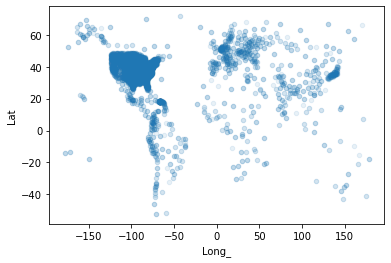

In [93]:
data_tr.plot(kind="scatter", x="Long_", y="Lat", alpha = 0.1)

In [94]:
data_cat = data[["Country_Region", "Last_Update"]]

data_cat.head(10)

,Country_Region,Last_Update
9996,US,2021-01-09 5:22
8829,US,2021-01-09 5:22
856,US,2021-01-07 5:22
1472,US,2021-01-07 5:22
2660,US,2021-01-07 5:22
8186,Germany,2021-01-09 5:22
8647,US,2021-01-09 5:22
6176,US,2021-01-08 5:22
3457,US,2021-01-07 5:22
10477,US,2021-01-09 5:22


In [95]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
data_cat_encoded[10000:10020]

array([], shape=(0, 2), dtype=float64)

In [96]:
ordinal_encoder.categories_

[array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
        'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
        'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
        'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
        'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Chad', 'Chile',
        'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)',
        'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
        'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess',
        'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
        'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
        'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
        'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
        'Guatemala', 'Guinea', 'Guinea-

In [97]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

<9544x196 sparse matrix of type '<class 'numpy.float64'>'
	with 19088 stored elements in Compressed Sparse Row format>

In [98]:
data_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [99]:
data_cat_1hot

<9544x196 sparse matrix of type '<class 'numpy.float64'>'
	with 19088 stored elements in Compressed Sparse Row format>

In [100]:
train_set

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,confirmed_cat
9996,US,2021-01-09 5:22,44.823677,-94.272870,3168,41,0,3127.0,"McLeod, Minnesota, US",8826.233527,1.294192,5
8829,US,2021-01-09 5:22,36.603082,-121.069975,4266,36,0,4230.0,"San Benito, California, US",6792.128391,0.843882,5
856,US,2021-01-07 5:22,36.074091,-119.815997,16860,110,0,16750.0,"Kings, California, US",11023.930950,0.652432,5
1472,US,2021-01-07 5:22,42.385211,-94.640460,1200,9,0,1191.0,"Calhoun, Iowa, US",12412.081090,0.750000,5
2660,US,2021-01-07 5:22,35.710151,-79.805703,8788,133,0,8655.0,"Randolph, North Carolina, US",6116.923163,1.513427,5
...,...,...,...,...,...,...,...,...,...,...,...,...
8324,Lebanon,2021-01-09 5:22,33.854700,35.862300,210139,1570,138839,69730.0,Lebanon,3078.760321,0.747125,5
10206,US,2021-01-09 5:22,37.616230,-93.398282,1934,24,0,1910.0,"Polk, Missouri, US",6015.739214,1.240951,5
6253,US,2021-01-08 5:22,37.317289,-91.965647,1405,18,0,1387.0,"Texas, Missouri, US",5531.931648,1.281139,5
10123,US,2021-01-09 5:22,39.984922,-94.801630,1169,15,0,1154.0,"Andrew, Missouri, US",6600.045167,1.283148,5


In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

data_num_tr = num_pipeline.fit_transform(data_num)
data_num_tr

array([[ 0.68640614, -0.41161891, -0.15759632, ...,  0.83108281,
        -0.09186701,  0.04061925],
       [ 0.04487942, -0.91824869, -0.15932223, ...,  0.20705189,
        -0.15374418,  0.04061925],
       [ 0.00359749, -0.89454081, -0.13377873, ...,  1.50530123,
        -0.18005137,  0.04061925],
       ...,
       [ 0.10061538, -0.36799823, -0.16553551, ..., -0.17955632,
        -0.09366064,  0.04061925],
       [ 0.3087947 , -0.42161572, -0.16657106, ...,  0.14812383,
        -0.09338456,  0.04061925],
       [ 0.20760575, -0.45658554, -0.1658807 , ...,  0.5197444 ,
         0.26241009,  0.04061925]])

In [102]:
from sklearn.compose import ColumnTransformer

num_attribs = list(data_num)
cat_attribs = ["Country_Region", "Last_Update"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

data_prepared = full_pipeline.fit_transform(data)

In [103]:
data_labels_confirmed

9996       3168
8829       4266
856       16860
1472       1200
2660       8788
          ...  
8324     210139
10206      1934
6253       1405
10123      1169
5600        439
Name: Confirmed, Length: 9544, dtype: int64

In [114]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels_confirmed)

some_data = data.iloc[:50]
some_labels = data_labels_confirmed.iloc[:50]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [3.16937462e+03 4.26718740e+03 1.68587757e+04 1.19872531e+03
 8.78842783e+03 3.53629119e+04 1.07344457e+03 8.15039362e+02
 4.46604181e+03 9.34419634e+04 3.93432646e+03 1.27216881e+03
 1.24477359e+04 2.80038061e+03 7.68910821e+03 1.70402189e+03
 5.39738750e+03 1.52254024e+05 1.17989040e+03 4.38229052e+02
 3.59408231e+03 1.85676149e+03 1.00452424e+03 1.47808979e+03
 9.03311237e+03 2.62203734e+03 2.61922267e+03 3.30398424e+03
 6.87292582e+02 2.70732602e+03 2.84272582e+03 1.17187651e+04
 3.23553910e+03 8.81443696e+02 5.50990020e+03 7.21543389e+03
 1.46367209e+02 6.03381759e+03 1.14827869e+04 8.98714868e+03
 4.33690871e+03 5.98704937e+02 3.30568942e+02 8.50179824e+03
 6.43573607e+02 1.14217773e+01 2.53897867e+03 1.07527044e+03
 1.01940583e+03 2.03980725e+03]
Labels: [3168, 4266, 16860, 1200, 8788, 35363, 1073, 814, 4466, 93440, 3935, 1272, 12446, 2799, 7688, 1704, 5399, 152254, 1186, 437, 3594, 1854, 1003, 1477, 9031, 2621, 2619, 3304, 688, 2709, 2843, 11718, 3234, 882, 5510, 7

In [109]:
from sklearn.metrics import mean_squared_error
data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels_confirmed, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

33.35635930398283

In [111]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_prepared, data_labels_confirmed)

DecisionTreeRegressor()

In [112]:
data_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(data_labels_confirmed, data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

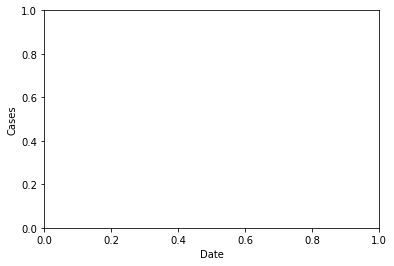

In [119]:
import datetime

plt.xlabel("Date")
plt.ylabel("Cases")

plt.scatter(datetime(data[""]))